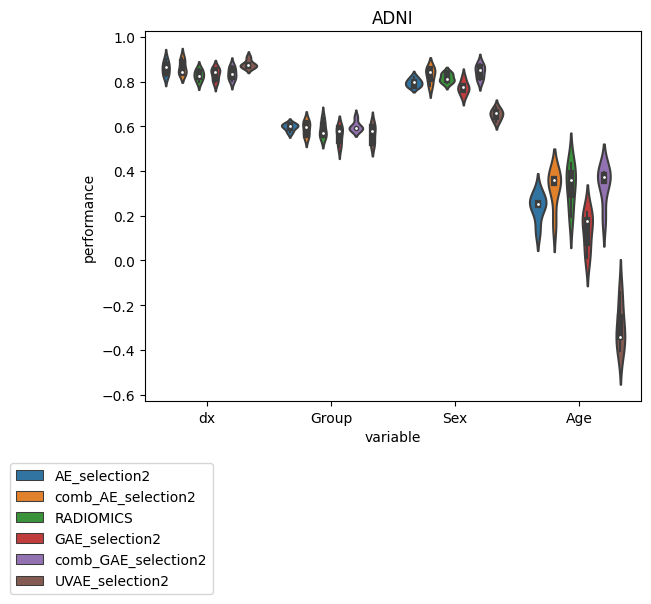

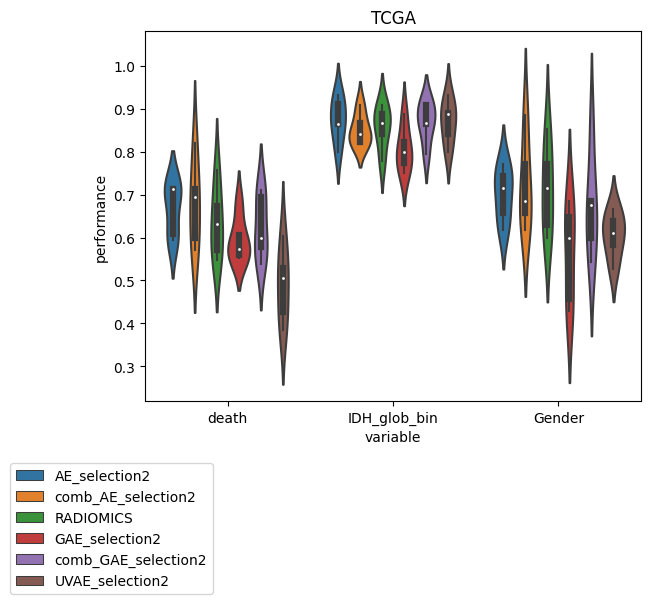

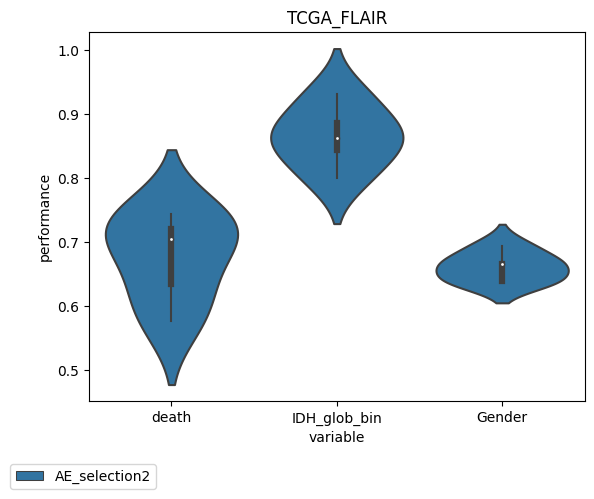

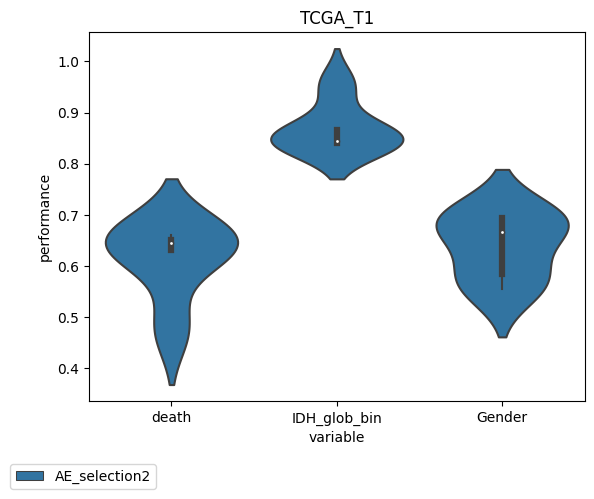

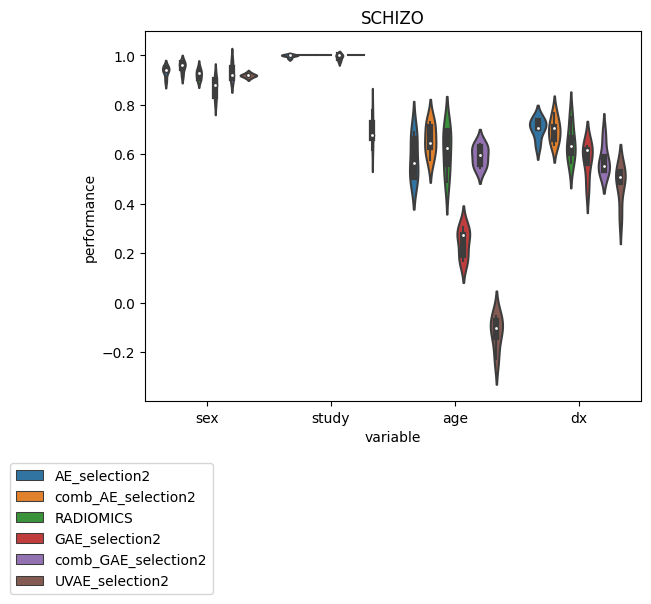

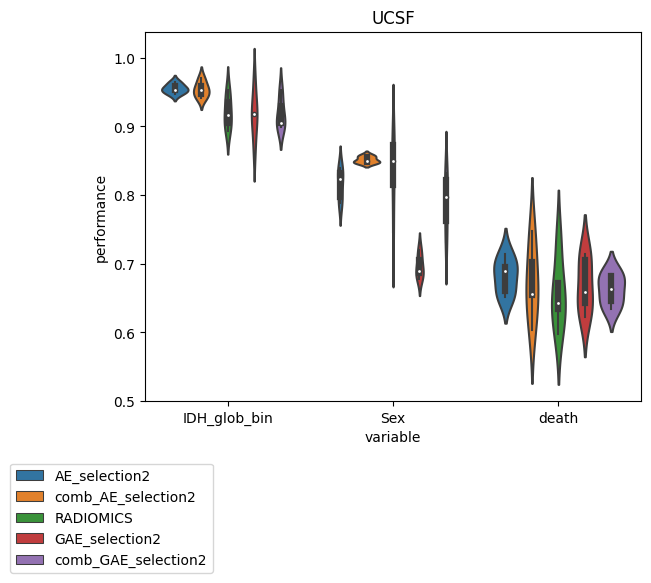

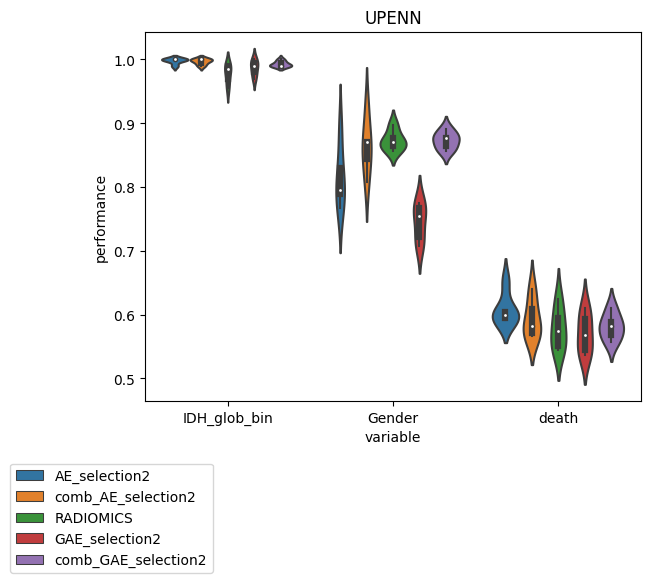

In [2]:
from os.path import join
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# plt.rcParams['figure.figsize'] = [13, 5]

root = "/home/tbarba/projects/MultiModalBrainSurvival/outputs/test"
datasets = ["ADNI", "TCGA", "SCHIZO"]

models = [
    "RADIOMICS",
    "AE_selection2",
    "comb_AE_selection2",
    "GAE_selection2",
    "comb_GAE_selection2",
    "AE_selection",
    "AE_selection_attn",
    "AE_fused_singleDO",
    # "uVAE_fused_single2", 
    "VAE3D_selection2",
    "VAE3D_fused_single", 
    # "VAE3D_selection",
    # "AE_selection",
    #   "2mod_uVAE_fused",
          ]

datasets = ["ADNI", "TCGA", "SCHIZO", "UCSF","UPENN"]

models = [
    # "AE_single",
    "AE_selection2",
    "comb_AE_selection2",
    "RADIOMICS",
    "GAE_selection2",
    "comb_GAE_selection2",
    "UVAE_selection2",
    # "AE_selection",
    # "AE_selection_attn",
    # "uVAE_fused_single2", 
    # "VAE3D_selection2",
    # "VAE3D_fused_single", 
    # "VAE3D_selection",
    # "AE_selection",
    #   "2mod_uVAE_fused",
          ]

dfs = []
for d in datasets:
    try:
        for m in models:
            df = pd.read_csv(join(root, d, f"multivariate/{m}.csv"))
            df["model"] = m
            df["dataset"] = d
            dfs.append(df)
    except:
        pass
df = pd.concat(dfs)


for dataset in datasets:
    plt.figure()
    sub = df.query("dataset == @dataset and 'UVAE_single' not in model and 'grade' not in variable")#.sort_values(by=["model", "variable"])
    sns.violinplot(sub, x = "variable", y="performance", hue="model")
    plt.legend(bbox_to_anchor=(0.15, -0.15))
    plt.title(dataset)
